In [155]:
# Initialize Otter
import otter
grader = otter.Notebook("cs109a_hw5.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 5: Predicting College Admissions

**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai

<hr style="height:2.4pt">

In [156]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [157]:
# RUN THIS CELL
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- Plots should be legible and interpretable without having to refer to the code that generated them, including labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you think the plot *means*.
- The use of 'hard-coded' values to try and pass tests rather than solving problems programmatically will not receive credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output.
- Feel free to add additional code or markdown cells as needed.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells. This is how the notebook will be evaluated (note that this can take a few minutes). 
- **You should do a "Restart Kernel and Run All Cells" before submitting to ensure (1) your notebook actually runs and (2) all output is visible**

<a id="contents"></a>

## Notebook contents

- [**Overview and data description**](#intro)


- [**Question 1: Data exploration using train and basic models [16 pts]**](#part1)

- [**Question 2: Interpretable modeling [18 pts]**](#part2)

- [**Question 3: Harvard and Yale? [30 pts]**](#part3)

- [**Question 4: Building predictive models for admitted [24 pts]**](#part4)

- [**Question 5: Evaluating results [12 pts]**](#part5)

<a id="intro"></a>

## Overview and data description

[Return to contents](#contents)

### Predicting admissions into elite universities

In this problem set we will model the chances of high school students being accepted into two different elite undergraduate colleges (one is elite at least :) ): Harvard and Yale.  The data are provided in the file `data/college_admissions.csv` and were scraped from [collegedata.com](https://www.collegedata.com/) (where applicants volunteer to share their information).  Each observation corresponds to an applicant to one of the two different colleges (note: the same applicant may show up in two rows: once for each college).  The main response is the `"admitted"` variable (1 = admitted, 0 = denied), and there are are several predictors to consider:

- **id**: a unique identifier for the applicant 
- **test_score**: a standardized measurement of the applicant's highest ACT or SAT combined score (2400 is the maximum)
- **ap**: the number of AP tests taken
- **avg_ap**: the average score on the AP tests taken (0 if no tests were taken)
- **sat_subjects**: the number of SAT subject tests taken
- **gpa**: the unweighted GPA of the applicant (max of 4.0)
- **female**:  a binary indicator for gender: 1 = female, 0 = otherwise
- **minority**: a binary indicator for under-represented minority: 1 = minority, 0 = otherwise 
- **international**: a binary indicator for international status: 1 = international, 0 = United States
- **sports**: a binary indicator for High School All-American: 1 = all-American athlete, 0 = otherwise
- **school**: a categorical variable for school applied to: "Harvard" or "Yale"
- **early_app**: a binary indicator for application type: 1 = early action, 0 = regular
- **alumni**:  a binary indicator for parents' alumni status of school: 1 = a parent is an alumnus, 0 = otherwise
- **program**: the program applied to by the student with many choices (we will not use this as a predictor)
- **add_info**: additional (optional) info provided by applicant (we will not use this as a predictor)

**The main set of 12 predictors is:**

```python
[
    "test_score", "ap", "avg_ap", "sat_subjects", 
    "gpa", "female", "minority", "international",
    "sports", "school", "early_app", "alumni",
]
```

Please note, you may need to modify this list when fitting different models, and you will be replacing the `"school"` variable with a binary `"harvard"` variable early in the questions below.


**IMPORTANT NOTES:**

- Unless stated otherwise, all logistic regression models should be unregularized (use `penalty="none"`) and include the intercept (which is the default in `sklearn`).


- When printing your output (e.g. coefficients, accuracy scores, etc.), DO NOT just print numbers without context. Please be certain provide clarifying labels for all printed numbers and limit the number of digits showing after decimals to a reasonable length (e.g. 4 decimal points for coefficients and accuracy scores).


- Also be sure to practice good data science principles: always use train to do analysis and never touch the test set until the very end.

---

<a id="part1"></a>

## <div class='exercise'>Question 1: Data exploration using train and basic models [16 pts]</div>

[Return to contents](#contents)

The first step is to split the observations into an approximate 80-20 train-test split.  Below is some code to do this for you (we want to make sure everyone has the same splits). It also prints the dataset's shape before splitting and after splitting. 

**IMPORTANT:** While an argument could be made to scale our predictors here, please **DO NOT** do so **UNTIL** it is requested of you in **[Question 4.1](#part4)**.


In [158]:
#############################
## DO NOT MODIFY THIS CODE ##
#############################

college = pd.read_csv("data/college_admissions.csv")
np.random.seed(121)

college_train, college_test = train_test_split(
    college,
    test_size=0.2,
    random_state=121,
    shuffle=True,
    stratify=college["school"],
)

print(college.shape)
print(college_train.shape, college_test.shape)
display(college_train.head())
college_train.info()

(1871, 16)
(1496, 16) (375, 16)


,id,admitted,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,school,early_app,alumni,program,add_info
584,JTEQOV7ZCB,0,2080,5,4.400,4,3.90,1,0,0,0,Harvard,1,0,Mechanical Engineering,Swimming 3 years Water Polo 3 years Foreign Language Honor Society PresidentMerit award in Socia...
1817,I03PV24OHY,1,2190,6,3.667,3,3.97,1,0,0,0,Yale,0,0,legal studies,horseback riding 5 hrs week year round marching concert jazz and orchestral ensembles 30 hrs wee...
1308,K42SAOUYJJ,0,2140,2,4.500,3,3.70,0,0,0,0,Yale,0,0,Film,Lacrosse Film Club Take Action Club NYU Tisch Summer Film WorkshopNational Honors Society World ...
1336,LODYYSRTYZ,0,2120,6,3.333,3,4.00,1,0,0,0,Yale,1,0,Biological Sciences,Varsity Orchestra Music Librarian 10 11 12 Violin Player Girl Scouts 10 year Member sold over 65...
3,OC717EAKXN,1,2400,5,5.000,5,4.00,1,0,0,0,Harvard,0,0,Mathematics,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 584 to 1537
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1496 non-null   object 
 1   admitted       1496 non-null   int64  
 2   test_score     1496 non-null   int64  
 3   ap             1496 non-null   int64  
 4   avg_ap         1496 non-null   float64
 5   sat_subjects   1496 non-null   int64  
 6   gpa            1496 non-null   float64
 7   female         1496 non-null   int64  
 8   minority       1496 non-null   int64  
 9   international  1496 non-null   int64  
 10  sports         1496 non-null   int64  
 11  school         1496 non-null   object 
 12  early_app      1496 non-null   int64  
 13  alumni         1496 non-null   int64  
 14  program        1294 non-null   object 
 15  add_info       933 non-null    object 
dtypes: float64(2), int64(10), object(4)
memory usage: 198.7+ KB


<div class='exercise-r'>

**Q1.1** Calculate the proportion of observations in the train data that were admitted and store this value in `prop_admitted_train`.  What would be the train and test classification accuracies for a baseline "naive" model where we classified *ALL* applicants as either admitted or not admitted using just this overall proportion to make our decision (i.e. we apply the same outcome to all applicants based on this proportion)? Store these classification accuracies in `naive_train_acc` and `naive_test_acc`.
    
**NOTE:** For this assignment, use the convention that accuracies range from 0 to 1 (to be consistant with sklearn).
    
</div>

_Points:_ 2.5

In [159]:
# your code here
train_admitted = len([i for i in college_train['admitted'] if i==1])
prop_admitted_train = train_admitted / (len(college_train['admitted']))

test_admitted = len([i for i in college_test['admitted'] if i==1])
prop_admitted_test = test_admitted / (len(college_test['admitted']))

naive_train_acc = prop_admitted_train
naive_test_acc = prop_admitted_test

In [160]:
print(f"Proportion Admitted in training Data: {prop_admitted_train:.2f}")
print("Naive Classification Model Based on Training Proportions")
print(f"\tTrain Accuracy: {naive_train_acc:.2f}")
print(f"\tTest Accuracy: {naive_test_acc:.2f}")

Proportion Admitted in training Data: 0.26
Naive Classification Model Based on Training Proportions
	Train Accuracy: 0.26
	Test Accuracy: 0.30


In [161]:
grader.check("q1.1")

q1.1 results: All test cases passed!

self._engine.get_loc(casted_key)<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q1.2** Create a binary ("dummy") variable named `"harvard"` in both the train and test DataFrames that takes on the value 1 if `school == "Harvard"` and 0 otherwise. Now, explore how each of our 12 predictors is associated with whether or not an applicant is admitted into the college to which they applied (`admitted`). Create a separate **visual** for each of our predictors to investigate their relationship with college admissions. **Suggestion:** Place these 12 visuals in a *matrix* of subplots with 3 columns and 4 rows.

**NOTE:** We will be using our dummified `harvard` predictor instead of `school` throughout the remainder of this problem set.
    
</div>

_Points:_ 0

In [ ]:
# college_test.head() 

# train_val = []
# for k in X_train['school']:
#     if k == 'Harvard':
#         train_val.append(1)
#     else:
#         train_val.append(0)
# X_train.loc['harvard'] = train_val 
# X_train.head() 


# test_val = []
# for k in X_test['school']:
#     if k == 'Harvard':
#         test_val.append(1)
#     else:
        # test_val.append(0)
# X_test['harvard'] = test_val
# X_test.head()   

In [162]:
college_train["harvard"] = 0
college_test["harvard"] = 0

mask_train = college_train['school'] == 'Harvard'
college_train.loc[mask_train, "harvard"] = 1
# mask_train_0 = college_train['school'] != 'Harvard'
# college_train.loc[mask_train_0, "harvard"] = 0

mask_test = college_test['school'] == 'Harvard'
college_test.loc[mask_test, "harvard"] = 1
# mask_test_0 = college_train['school'] != 'Harvard'
# college_test.loc[mask_test_0, "harvard"] = 0

college_train.head()
college_test.head()

,id,admitted,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,school,early_app,alumni,program,add_info,harvard
1268,7QE2EEAS0E,0,2160,6,4.333,4,4.0,1,0,0,0,Yale,1,0,Anthropology,Have 2 jobs teaching religious school and working in archival room at local library Academic Tea...,0
1511,5NSAZA57M3,0,1720,2,3.500,4,3.9,1,1,0,0,Yale,1,0,history,president of class 3 years employed school leadership team nutrition club dance committee volunt...,0
583,BEQC4RRH81,0,2090,2,4.000,3,4.0,1,0,0,0,Harvard,0,0,Biomedical Engineering,NaN,1
1237,7F7WPR7PVZ,0,2180,0,0.000,2,4.0,0,1,1,0,Yale,0,0,International Relations,NaN,0
1542,RY2VQSAH3U,0,2360,4,5.000,3,3.8,1,0,0,0,Harvard,0,0,Comparative Literature,NaN,1


In [163]:
pred = ["test_score", "ap", "avg_ap", "sat_subjects", "gpa", "female", "minority", 
             "international","sports", "harvard", "early_app", "alumni", "admitted"]

college_train = college_train[pred]
college_test = college_test[pred]

In [164]:
pred_cols = ["test_score", "ap", "avg_ap", "sat_subjects", "gpa", "female", "minority", 
             "international","sports", "harvard", "early_app", "alumni"]

X_train = college_train[pred_cols]
y_train = college_train["admitted"]
X_test = college_test[pred_cols]
y_test = college_test["admitted"]
X_train

,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,harvard,early_app,alumni
584,2080,5,4.400,4,3.90,1,0,0,0,1,1,0
1817,2190,6,3.667,3,3.97,1,0,0,0,0,0,0
1308,2140,2,4.500,3,3.70,0,0,0,0,0,0,0
1336,2120,6,3.333,3,4.00,1,0,0,0,0,1,0
3,2400,5,5.000,5,4.00,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2230,2,4.500,3,4.00,1,0,0,0,0,0,0
368,2230,5,4.800,2,4.00,0,0,0,0,1,1,0
648,2020,0,0.000,3,4.00,1,0,1,0,1,0,1
121,2340,0,0.000,2,4.00,0,0,0,0,1,0,0


In [72]:
# fig_cols = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2],
#             [2,0],[2,1],[2,2],[3,0],[3,1],[3,2]]

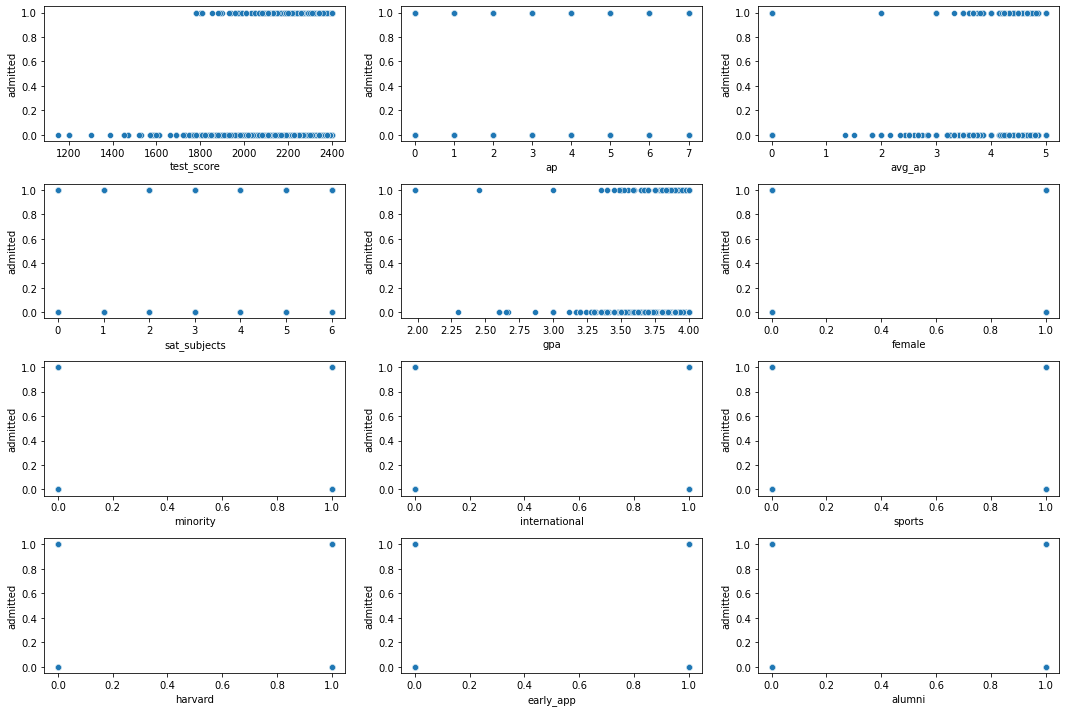

In [73]:
fig, axes = plt.subplots(4, 3, figsize=(15,10))

sns.scatterplot(ax=axes[0,0], data = college_train, x = pred_cols[0], y = "admitted")
sns.scatterplot(ax=axes[0,1], data = college_train, x = pred_cols[1], y = "admitted")
sns.scatterplot(ax=axes[0,2], data = college_train, x = pred_cols[2], y = "admitted")
sns.scatterplot(ax=axes[1,0], data = college_train, x = pred_cols[3], y = "admitted")
sns.scatterplot(ax=axes[1,1], data = college_train, x = pred_cols[4], y = "admitted")
sns.scatterplot(ax=axes[1,2], data = college_train, x = pred_cols[5], y = "admitted")
sns.scatterplot(ax=axes[2,0], data = college_train, x = pred_cols[6], y = "admitted")
sns.scatterplot(ax=axes[2,1], data = college_train, x = pred_cols[7], y = "admitted")
sns.scatterplot(ax=axes[2,2], data = college_train, x = pred_cols[8], y = "admitted")
sns.scatterplot(ax=axes[3,0], data = college_train, x = pred_cols[9], y = "admitted")
sns.scatterplot(ax=axes[3,1], data = college_train, x = pred_cols[10], y = "admitted")
sns.scatterplot(ax=axes[3,2], data = college_train, x = pred_cols[11], y = "admitted")

plt.tight_layout()
plt.show()

In [74]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**1.3** Based on the visuals above, which predictor seems to have the most potential for predicting `admitted`? Why do you think this it the best potential single predictor?
    
</div>

_Points:_ 1.5

Test score, gpa, avg_ap

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>
    
**Q1.4** Fit a logistic regression to predict `admitted` from `harvard` (call it `logit1_4`).  
- Store the coefficient and intercept in `logit1_4_coef` and `logit1_4_intercept`. Interpret these values.
- What are the estimated probabilities of getting into each school? Store these in `p_harvard` and `p_yale`. Which school is easier to get into according to this model?

**IMPORTANT:** Remember, all models in this assignment should be **unregularized** unless you are specifically asked to use regularization for a particular model.
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [109]:
X_train_harvard = pd.DataFrame(X_train['harvard'])
mask_X_train_harvard = pd.DataFrame(X_train['harvard'] == 1)
mask_X_train_harvard

,harvard
584,True
1817,False
1308,False
1336,False
3,True
...,...
1114,False
368,True
648,True
121,True


In [125]:
mask_X_train_yale = pd.DataFrame(X_train['harvard'] == 0)
mask_X_train_yale

,harvard
584,False
1817,True
1308,True
1336,True
3,False
...,...
1114,True
368,False
648,False
121,False


In [150]:
# your code here
...
# Fit logistic regression model without regularization
logit1_4 = LogisticRegression(penalty='none', max_iter=10000).fit(X_train_harvard, y_train)
# y_pred_train = logit1_4.predict(X_train)
# Identify and report coefficients
logit1_4_coef = float(logit1_4.coef_)
logit1_4_intercept = float(logit1_4.intercept_)
# Calculate and report probabilities
p_harvard = float(np.mean(logit1_4.predict_proba(mask_X_train_harvard)[:,1]))
p_yale = float(np.mean(logit1_4.predict_proba(mask_X_train_yale)[:,1]))

In [151]:
print(
    "The coefficient for the 'logit1_4' model's only predictor 'harvard' "
    "is {:.4f} and the intercept is {:.4f}\n".format(
        logit1_4_coef, logit1_4_intercept
    )
)

print(
    "Estimated probability of acceptance for Harvard: {:.4f}"
    .format(p_harvard)
)
print(
    "Estimated probability of acceptance for Yale: {:.4f}"
    .format(p_yale)
)

The coefficient for the 'logit1_4' model's only predictor 'harvard' is 0.1532 and the intercept is -1.1137

Estimated probability of acceptance for Harvard: 0.2627
Estimated probability of acceptance for Yale: 0.2613


In [152]:
grader.check("q1.4")

q1.4 results:
    q1.4 - 1 result:
        Test case passed!

    q1.4 - 2 result:
        Trying:
            assert np.isclose(p_harvard, 0.2768, atol=0.0001), "Incorrect value for p_harvard"
        Expecting nothing
        **********************************************************************
        Line 2, in q1.4 1
        Failed example:
            assert np.isclose(p_harvard, 0.2768, atol=0.0001), "Incorrect value for p_harvard"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/karenkuo/opt/anaconda3/lib/python3.9/doctest.py", line 1334, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1.4 1[0]>", line 1, in <module>
                assert np.isclose(p_harvard, 0.2768, atol=0.0001), "Incorrect value for p_harvard"
            AssertionError: Incorrect value for p_harvard
        Trying:
            assert np.isclose(p_yale, 0.2472, atol=0.0001), "Incorrect value for p_yale"
        Expecting nothing
        **********************************************************************
        Line 3, in q1.4 1
        Failed example:
            assert np.isclose(p_yale, 0.2472, atol=0.0001), "Incorrect value for p_yale"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/karenkuo/opt/anaconda3/lib/python3.9/doctest.py", line 1334, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1.4 1[1]>", line 1, in <module>
                assert np.isclose(p_yale, 0.2472, atol=0.0001), "Incorrect value for p_yale"
            AssertionError: Incorrect value for p_yale

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q1.5** Create and display a [contingency table](https://en.wikipedia.org/wiki/Contingency_table) between `admitted` and `harvard`.  Use this table to calculate and confirm the coefficient estimates in the `logit1_4` model (both the intercept and slope). Show this calculation using $\LaTeX$ in a markdown cell.
    
**Hint:** The Pandas [crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) method may be helpful here.

</div>

_Points:_ 3

_Type your answer here, replacing this text._

In [89]:
pd.crosstab(college_train['admitted'],college_train['harvard'])

harvard,0,1
admitted,,
0,536,567
1,176,217


In [91]:
college_train['harvard'].value_counts()

1    784
0    712
Name: harvard, dtype: int64

In [92]:
college_train['admitted'].value_counts()

0    1103
1     393
Name: admitted, dtype: int64

Harvard:
P(Y=1) = 217/784 ≈ 0.277
P(Y=0) = 567/784 ≈ 0.723


Yale:
P(Y=1) = 176/712 ≈ 0.247
P(Y=0) = 536/712 ≈ 0.752

β0 +  β1x1 = ln(P(Y=1)/P(Y=0)) 
β0 +  β1x1 = ln(0.277/0.723) ≈ 0.382



β0 +  β1x1 = ln(P(Y=1)/P(Y=0)) 
β0 +  β1x1 = ln(0.247/0.752) ≈ 0.328




<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q1.6** Compare the estimated probabilities of being admitted into the schools to the overall acceptance rate (as seen [here](https://www.ivycoach.com/2023-ivy-league-admissions-statistics/)).  Why may what you've observed in this comparison be the case?
    
</div>

_Points:_ 2

The dataset is not complete, it is only showing values from students volunteer to share their results. The actual results are way hgiher than the dataset. For instance, the total application received should be 43,330. 

<!-- END QUESTION -->

---

<a id="part2"></a>

## <div class='exercise'>Question 2: Interpretable modeling [18 pts]</div>

[Return to contents](#contents)

<div class='exercise-r'>

**Q2.1** 
    
- Fit a logistic regression model to predict `admitted` from `test_score` alone. Call it `logit2_1`.
- Store the learned parameters in `logit2_1_beta0` and `logit2_1_beta1`. 
- Store the train and test classification accuracies for this model in `acc_train_logit2_1` and `acc_test_logit2_1`.
    
</div>

_Points:_ 3

In [173]:
# your code here
logit2_1 = LogisticRegression(penalty='none', max_iter=10000).fit(pd.DataFrame(X_train['test_score']), y_train)

logit2_1_intercept = float(logit2_1.intercept_)
logit2_1_coef_test = float(logit2_1.coef_)

acc_train_logit2_1 = float(logit2_1.score(pd.DataFrame(X_train['test_score']), y_train))
acc_test_logit2_1 = float(logit2_1.score(pd.DataFrame(X_test['test_score']), y_test))

In [174]:
print("The intercept and coefficient for the 'logit2_1' model are:")

print("\t{:<20}{:.4f}".format('intercept', logit2_1_intercept))
print("\t{:<20}{:.4f}".format('test', logit2_1_coef_test))

print(
    "\nThe classification accuracies for 'logit2_1' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}".format(
        acc_train_logit2_1, acc_test_logit2_1
    )
)
# END SOLUTION

The intercept and coefficient for the 'logit2_1' model are:
	intercept           -9.4136
	test                0.0038

The classification accuracies for 'logit2_1' are:

	Train	0.7373
	TEST	0.7013


In [175]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<div class='exercise-r'>

**Q2.2**
    
- What is the estimated probability of an applicant being admitted with an *average* `test` score of 2250? Store this in `prop_test_2250`.
- What about if they had a perfect test score of 2400? Store this in `prop_test_2400`.
- What test score would be needed to have a 50-50 chance (i.e. 0.5 probability) of being admitted? Store this in `test_50_50`.
    
</div>

_Points:_ 4

_Type your answer here, replacing this text._

In [177]:
# your code here
prob_test_2250 = logit2_1.predict_proba(2250,1)
prob_test_2400 = ...

test_50_50 = ...

TypeError: predict_proba() takes 2 positional arguments but 3 were given

In [ ]:
# your code here
print(
    "The estimated chances of an applicant being admitted with "
    "the following two 'test' scores:\n\n\tscore\tprobabilities"
    "\n\t2250\t{:.4f}\n\t2400\t{:.4f}\n"
    .format(prob_test_2250, prob_test_2400)
)

print(
    "The test score required to have a 50-50 chance of being "
    "admitted is approximately:\n\n\t{:.2f}"
    .format(test_50_50)
)
# END SOLUTION

In [ ]:
grader.check("q2.2")

<div class='exercise-r'>

**Q2.3** Fit a logistic regression model to predict `admitted` from `test_score` and `avg_ap` (call it `logit2_3`).  Print out the coefficient estimates along with the classification accuracies for this model (on both train and test data).
    
</div>

_Points:_ 3

In [ ]:
# your code here
...
logit2_3 = ...

logit2_3_coef_test = ...
logit2_3_coef_avg_ap = ...
logit2_3_intercept = ...

acc_train_logit2_3 = ...
acc_test_logit2_3 = ...

In [ ]:
# Print the parameters of logit2_3
print("The intercept and coefficients for the 'logit2_3' model are:")
print("\t{:<20}{:.4f}".format('intercept', logit2_3_intercept))
print("\t{:<20}{:.4f}".format('test', logit2_3_coef_test))
print("\t{:<20}{:.4f}".format('avg_ap', logit2_3_coef_avg_ap))

print(
    "\nThe classification accuracies for 'logit2_3' are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit2_3, acc_test_logit2_3)
)

In [ ]:
grader.check("q2.3")

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q2.4** Interpret the coefficient estimates for both predictors in `logit2_3` and compare the coefficient estimate for `test_score` to the one from `logit2_1`.  Why has this estimate changed?

You should inspect the relationship between `test_score` and `avg_ap` to help get a better sense for what might be happening here.

</div>

_Points:_ 4

In [ ]:
# Print the parameters of the last 2 models
print("The intercept and coefficient for the 'logit2_1' model are:")

print("\t{:<20}{:.4f}".format('intercept', logit2_1_intercept))
print("\t{:<20}{:.4f}".format('test_score', logit2_1_coef_test))

print("The intercept and coefficients for the 'logit2_3' model are:")
print("\t{:<20}{:.4f}".format('intercept', logit2_3_intercept))
print("\t{:<20}{:.4f}".format('test_score', logit2_3_coef_test))
print("\t{:<20}{:.4f}".format('avg_ap', logit2_3_coef_avg_ap))

_Type your answer here, replacing this text._

In [ ]:
# your code here
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q2.5** Interpret and compare the classification accuracies for the two models, `logit2_1` and `logit2_3`.  Explain why these accuracies are the same or different, and what about the data makes these accuracies so similar or different.

</div>

_Points:_ 4

In [ ]:
# Display accuracies of last 2 models
print(
    "\nThe classification accuracies for 'logit2_1' are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit2_1, acc_test_logit2_1)
)
print(
    "\nThe classification accuracies for 'logit2_3' are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit2_3, acc_test_logit2_3)
)

_Type your answer here, replacing this text._

<!-- END QUESTION -->

---

<a id="part3"></a>

## <div class='exercise'>Question 3: Harvard and Yale? [30 pts]</div>

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.1**
- Fit a logistic regression model (call it `logit3_1`) to predict `admitted` from 7 predictors: `["harvard", "test_score", "ap", "avg_ap", "gpa", "female", "minority"]`.
- Store the train and test accuracies in `acc_train_logit3_1` and `acc_test_logit3_1`.
- Use the code provided to output the coefficient estimates. Interpret the coefficients for the binary predictors in this model.

**HINT:** If you have convergence warnings, increasing the maximum number of iterations will likely solve this issue.
    
</div>

_Points:_ 4

In [ ]:
# Print statements below assume predictors used in this order
logit3_1_predictors = ["harvard", "test_score", "ap", "avg_ap", "gpa", "female", "minority"]

_Type your answer here, replacing this text._

In [ ]:
# your code here
...
logit3_1 = ...
acc_train_logit3_1 = ...
acc_test_logit3_1 = ...

In [ ]:
# Grab model's intercept and coefs regardless of their shape
# (which depends on how x and y were shaped)
logit3_1_intercept = np.array(logit3_1.intercept_).flatten()[0]
logit3_1_coefs = logit3_1.coef_.flatten()

print(
    "The intercept and coefficients for the 'logit3_1' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", logit3_1_intercept
    )
)
for predictor, coef in zip(logit3_1_predictors, logit3_1_coefs):
    print("\t{:<20}{:.4f}".format(predictor, coef))

print(
    "\nThe classification accuracies for 'logit3_1' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit3_1, acc_test_logit3_1)
)

In [ ]:
grader.check("q3.1")

<!-- END QUESTION -->

<div class='exercise-r'>

**Q3.2** Fit a logistic regression model (call it `logit3_2`) to predict `admitted` from 3 predictors: `["harvard", "test_score", "ap"]` along with the 2 interaction terms: `harvard` with `test_score` and `harvard` with `ap`. Name the columns for these interaction terms `harvard_test_score` and `harvard_ap`.

</div>

_Points:_ 3

In [ ]:
# Print statement below assumes this order of predictors
logit3_2_predictors = ["harvard", "test_score", "ap", "harvard_test_score", "harvard_ap"]

In [ ]:
# your code here
...
logit3_2 = ...

In [ ]:
# Display results
logit3_2_intercept = np.array(logit3_2.intercept_).flatten()[0]
logit3_2_coefs = logit3_2.coef_.flatten()

print(
    "The intercept and coefficients for the 'logit3_2' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", logit3_2_intercept
    )
)

for predictor, coef in zip(logit3_2_predictors, logit3_2_coefs):
    print("\t{:<20}{:.4f}".format(predictor, coef))

In [ ]:
grader.check("q3.2")

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.3** Simplify and write out mathematically the above model from Question 3.2 for 2 applicants: (1) someone who is applying to Harvard and for (2) someone who is applying to Yale (keep `test_score` and `ap` as the unknown $X$s).  The basic framework given to you below may be helpful:

$$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p $$
    
**NOTE:** All of your mathematical statements should be written out in your markdown cells using $\LaTeX$. Show all your steps, not just the final result.

</div>

_Points:_ 4

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.4** Determine two classification boundaries mathematically for the model in the previous part (using the estimated coefficients): What range of values of `test_score` as a function of `ap` would an applicant be predicted to have a better than 50% chance (i.e. 0.5 probability) of being admitted into the college they applied to? 

Use the function for Harvard to answer the following question: if a student scored a perfect 2400 on `test_score`, what is the range of AP tests they should take in order to have a better than 50% chance of being admitted into Harvard?

Again, you should show your work in $\LaTeX$.
</div>

_Points:_ 5

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.5** Create two separate scatterplots (one for Harvard applicants and one for Yale applicants) with the predictor `test_score` on the y-axis and `ap` on the x-axis where `admitted` is color-coded and the marker denotes train vs. test data.  Then add the appropriate classification boundary from the previous part.  Compare these two plots (including both the location of the boundaries and where the points lie around these boundaries).

**NOTE:** As always, please be certain (a) your plot is titled, (b) everything is clearly labeled, and (c) the plot itself is formatted in a manner that makes it easy to read and interpret. It will likely take some careful work here to generate plots with data points that are clear and easy to see. You might try 'dithering' the points with a random offset so they are not all on top of one another.
    
</div>

_Points:_ 5

_Type your answer here, replacing this text._

In [ ]:
# your code here
...

In [ ]:
# your code here
...

<!-- END QUESTION -->

<div class='exercise-r'>

**Q3.6** Fit a logistic regression model (call it `logit3_6`) to predict `admitted` from 4 predictors: `["harvard", "test_score", "female", "minority"]` along with 2 interaction terms: `harvard` with `female` and `harvard` with `minority`. 
    
</div>

_Points:_ 3

In [ ]:
# Provided code assumes this order of predictors
logit3_6_predictors = ["harvard",
                       "test_score",
                       "female",
                       "minority",
                       "harvard_female",
                       "harvard_minority"
                      ]

In [ ]:
# your code here
...
logit3_6 = ...

In [ ]:
grader.check("q3.6")

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.7** Interpret the coefficients associated with `female` and `minority` (the two main effects AND the two interaction terms).
    
</div>

_Points:_ 4

In [ ]:
# Display results
logit3_6_intercept = np.array(logit3_6.intercept_).flatten()[0]
logit3_6_coefs = logit3_6.coef_.flatten()

print(
    "The intercept and coefficients for the 'logit3_6' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", logit3_6_intercept
    )
)

for predictor, coef in zip(logit3_6_predictors, logit3_6_coefs):
    print("\t{:<20}{:.4f}".format(predictor, coef))

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.8** Based on this sample, how does it appear that Harvard and Yale compare in admitting women and minorities?  Why would it be wrong to take this interpretation as truth?

</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

---

<a id="part4"></a>

## <div class='exercise'>Question 4: Building predictive models for admitted [24 pts]</div>

[Return to contents](#contents)

<div class='exercise-r'>

**Q4.1** You were instructed to NOT scale predictors in the prior sections above. The primary reason for this was to focus instead on the interpretability of our logistic regression coefficients. However, as we're sure you noticed, the numeric scale among our different predictors varies greatly (i.e. `test_score` values are in the 1,000's while others are much, much smaller). In practice, we might want to put our predictors all on a similar scale, particularly for regularized regression and/or distance-based algorithms such as $k$-NN classification. **(1)** Please explain why scaling under these circumstances might be important. Then, **(2)** actually apply standardized scaling to all of the **non-binary** predictors in our original set of 12 predictors. **For the sake of consistency, fit your scaler on just the training data. Then use it to transform both train and test.**

**IMPORTANT:** These scaled predictors should be used instead of the original unscaled versions of the predictors for the remainder of this problem set. Tests from this point on assume that `X_train` and `X_test` have been standardized with the approach outlined above. 

</div>

_Points:_ 4

_Type your answer here, replacing this text._

In [ ]:
# your code here
...

In [ ]:
# preview summary stats after standardizing
X_train.describe()

In [ ]:
grader.check("q4.1")

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q4.2** Fit a well-tuned $k$-NN classification model with main effects of all 12 predictors in it (call it `knn_model`).  Use `ks = [1, 3, 5, 9, 15, 21, 51, 71, 101, 131, 171, 201]` and 10-fold cross-validation with classification accuracy as the scoring metric. Plot, on a single set of axes, your resulting cross-validation mean training and mean validation scores at each value $k$. Then, store your chosen $k$ in `best_k` and the classification accuracy on train and test for your final fitted model as `knn_train_acc` and `knn_test_acc`.
    
</div>

_Points:_ 4

In [ ]:
np.random.seed(121) # Do not delete or modify this line of code

# your code here
...
best_k = ...
...
knn_train_acc = ...
knn_test_acc = ...

In [ ]:
# Plot cross-validation results
# your code here
...

In [ ]:
print(
    "The classification accuracies for 'knn_model' where k={} "
    "are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(
        best_k, knn_train_acc, knn_test_acc
    )
)

# create dict for storing test scores for each Q4 model
q4_test_scores = {"knn_model": knn_test_acc}

<!-- END QUESTION -->

<div class='exercise-r'>

**Q4.3** Fit the full logistic regression model (without penalty) with main effects of all 12 predictors in it (call it `logit_full`). Store the classification accuracy on train and test for this model in `logit_full_train_acc` and `logit_full_test_acc`.

**HINT:** If you have convergence warnings, increasing the maximum number of iterations will likely solve this issue.
    
</div>

_Points:_ 3

In [ ]:
# The code that prints your results assumes
# predictors were given to the model in this order
predictor_list = [
    "test_score", "ap", "avg_ap", "sat_subjects",
    "gpa", "female", "minority", "international",
    "sports", "harvard", "early_app", "alumni",
]

In [ ]:
# your code here
logit_full = ...

logit_full_train_acc = ...
logit_full_test_acc = ...

In [ ]:
# display your results
print(
    "The intercept and coefficients for the 'logit_full' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", np.array(logit_full.intercept_).flatten()[0]
    )
)

for predictor, coef in zip(predictor_list, logit_full.coef_.flatten()):
    print("\t{:<20}{:.4f}".format(predictor, coef))

print(
    "\nThe classification accuracies for 'logit_full' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(logit_full_train_acc, logit_full_test_acc)
)

# store test score to dict for later use
q4_test_scores["logit_full"] = logit_full_test_acc

In [ ]:
grader.check("q4.3")

<div class='exercise-r'>

**Q4.4** Fit a well-tuned Lasso-like logistic regression model from all 12 predictors in it (call it `logit_lasso`). Use `Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]` and 10-fold cross-validation with classification accuracy as the scoring metric. Store the classification accuracy on train and test for this model in `logit_lasso_train_acc` and `logit_lasso_test_acc`.

</div>

_Points:_ 4

In [ ]:
# your code here
...
logit_lasso = ...

logit_lasso_train_acc = ...
logit_lasso_test_acc = ...

In [ ]:
# Display your results
print(
    "The intercept and coefficients for the 'logit_lasso' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", np.array(logit_lasso.intercept_).flatten()[0]
    )
)

# Again, this code assumes predictors were given to the model
# in the order defined in `predictor_list`
for predictor, coef in zip(predictor_list, logit_lasso.coef_.flatten()):
    print("\t{:<20}{:.4f}".format(predictor, coef))

print(
    "\nThe classification accuracies for 'logit_lasso' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(logit_lasso_train_acc, logit_lasso_test_acc)
)

# store test score to dict for later use
q4_test_scores["logit_lasso"] = logit_lasso_test_acc

In [ ]:
grader.check("q4.4")

<div class='exercise-r'>

**4.5** Which predictors were deemed important in `logit_lasso`?  Which were deemed unimportant? Please remember that, as a general practice, zero-value Lasso coefficients (i.e. $\beta_i=0$) are considered "unimportant". Store your results in `predictors_important` and `predictors_not_important`.
 
</div>

_Points:_ 3

In [ ]:
# your code here
...
predictors_important = ...
predictors_not_important = ...

In [ ]:
# display results
print(
    "The following predictors were deemed important by "
    "'logit_lasso' (i.e. coef != 0):\n\n\t{}\n\n\n"
    "While, the remaining were deemed unimportant (i.e. "
    "coef == 0):\n\n\t{}"
    .format(
        predictors_important,
        predictors_not_important,
    )
)

In [ ]:
grader.check("q4.5")

<div class='exercise-r'>

**Q4.6** Fit a well-tuned Lasso-like logistic regression model with all important predictors from `logit_lasso` and all the unique 2-way interactions between them (call it `lasso_interact`).  Again use `Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]` and 10-fold cross-validation with classification accuracy as the scoring metric. Record the accuracy on train and test for this model in `lasso_interact_train_acc` and `lasso_interact_test_acc`.

</div>

_Points:_ 4

In [ ]:
# your code here
...

In [ ]:
# your code here
...
lasso_interact = ...
lasso_interact_train_acc = ...
lasso_interact_test_acc = ...

In [ ]:
print(
    "\nThe classification accuracies for 'logit_lasso_interact' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}\n"
    .format(lasso_interact_train_acc, lasso_interact_test_acc)
)

# store test score to dict for later use
q4_test_scores["lasso_interact"] = lasso_interact_test_acc

<div class='exercise-r'>

**Q4.7** How many of the predictors in our `logit_lasso_interact` model were deemed important and unimportant? Store these numbers in `num_important_coefs` and `num_unimportant_coefs`. 
    
</div>

_Points:_ 2

In [ ]:
# your code here
...
num_important_coefs = ...
num_unimportant_coefs = ...

In [ ]:
print(
    "Of the {} predictors used in our 'logit_lasso_interact' model:"
    "\n\n\t{} predictors were deemed 'important' by our model"
    "\n\t{} predictors were deemed 'unimportant' with 0-valued "
    "coefficients".format(
        num_important_coefs + num_unimportant_coefs,
        num_important_coefs,
        num_unimportant_coefs
    )
)

---

<a id="part5"></a>

## <div class='exercise'>Question 5: Evaluating results [12 pts]</div>

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q5.1** Which of the 4 models in Question 4 performs the best based on classification accuracy?  Which performs the worst? Based on these accuracies, how do these models perform compared to your baseline "naive" model back in Question 1.1? What does this comparison to the "naive" model tell us?
    
</div>

_Points:_ 2.5

In [ ]:
# your code here
print("The TEST accuracies for the 4 models in Q4 are:\n")
for key, value in q4_test_scores.items():
    print("\t{:<25}{:.4f}".format(key, value))
print(
    "\nThe TEST accuracy for our original baseline \"naive\" "
    "model was {:.4f}".format(naive_test_acc)
)

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q5.2** Draw the four ROC curves on the same set of axes using the test data.  How do these ROC curves compare?  Do the ROC curves support that the best model identified in Question 5.1 is better than the worst model identified in 5.1?  How do you know?
    
</div>

_Points:_ 4.5

_Type your answer here, replacing this text._

In [ ]:
# your code here
...

In [ ]:
# your code here
...

In [ ]:
# your code here
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**5.3** Calculate the AUC for all 4 models and store these in `auc_list`. **The order of AUCs in the list should match the order of the model as they appear in `q4_test_scores`.**
    
Do the rankings of these 4 models based on AUC match those for classification accuracy?  Why do you think this is the case?
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

In [ ]:
# your code here
# calculate each model's AUC using its ROC fpr and tpr
auc_list = ...
    
...

In [ ]:
print(
    "The TEST accuracies vs. AUC scores for the 4 models in Q4 are:"
    "\n\n\t\t\t\tAccuracy\tAUC"
)
for (key, value), auc_value in zip(q4_test_scores.items(), auc_list):
    print("\t{:<24}{:.4f}\t\t{:.4f}".format(key, value, auc_value))

In [ ]:
grader.check("q5.3")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q5.4** If you were to use one of these 4 models to present as a prediction model for the website [collegedata.com](https://www.collegedata.com/), which would you use and why?  What may be the biggest issue if this was a publicly available tool for college applicants to use to determine their chances of getting into Harvard and/or Yale?
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

**This concludes HW5. Thank you!**

[Return to contents](#contents)